In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from sklearn.model_selection import  train_test_split

In [2]:
# download data
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
#!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv


In [3]:
df_ = pd.read_csv('AirlineTweets.csv')
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df = df_[['airline_sentiment','text']].copy()
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


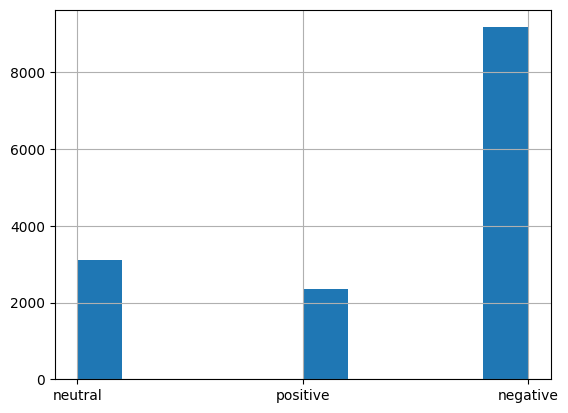

In [5]:
df['airline_sentiment'].hist();

In [6]:
target_map = {'positive':1,'negative':0,'neutral':2}
df['target'] = df['airline_sentiment'].map(target_map)

df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [7]:
df_train, df_test = train_test_split(df)

In [8]:
df_train.head()

,airline_sentiment,text,target
761,negative,@united at its worse. Can't figure how to pack...,0
8522,negative,@JetBlue I did not report the updated info - d...,0
8883,negative,@JetBlue I'll give u a chance but I don't thin...,0
796,negative,@united Yo yo yo stuck on the tarmac for over ...,0
10908,negative,"@USAirways yes, I was rebooked the next day (W...",0


In [9]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

In [10]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157104 stored elements in Compressed Sparse Row format>

In [11]:
X_test

<3660x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 52936 stored elements in Compressed Sparse Row format>

In [12]:
y_train = df_train['target']
y_test = df_test['target']


In [13]:
model =LogisticRegression(max_iter=500)
model.fit(X_train,y_train)

print('Train acc:',model.score(X_train,y_train))
print('Test acc:',model.score(X_test,y_test))

Train acc: 0.8551001821493625
Test acc: 0.8057377049180328


In [14]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)

In [15]:
pr_train = model.predict_proba(X_train) #[:,1]
pr_test = model.predict_proba(X_test) #[:,1]

print('Train AUC:', roc_auc_score(y_train,pr_train,multi_class='ovo'))
print('Test AUC:', roc_auc_score(y_test,pr_test,multi_class='ovo'))



Train AUC: 0.9429819587908499
Test AUC: 0.8954998940170622


In [16]:
cm = confusion_matrix(y_train, p_train, normalize='true')
cm

array([[0.96256215, 0.0087745 , 0.02866335],
       [0.19258843, 0.70859068, 0.09882089],
       [0.29775519, 0.04786108, 0.65438374]])

In [17]:
def plot_cm(cm):
  classes = ['negative','positive','neutral']
  df_cm = pd.DataFrame(cm, index= classes,columns=classes)
  ax = sns.heatmap(df_cm, annot= True, fmt='g')
  ax.set_xlabel('Prediction')
  ax.set_ylabel('Target')
  plt.show()


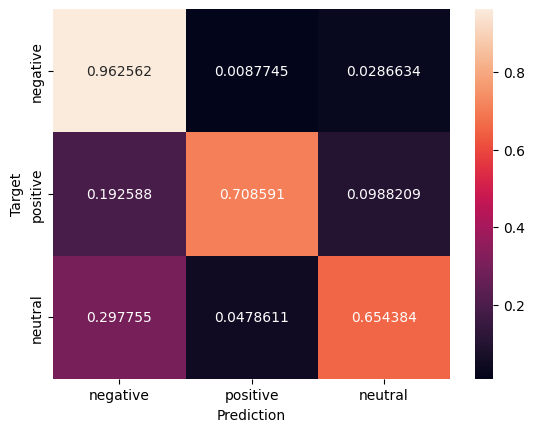

In [18]:
plot_cm(cm)

In [19]:
cm_test = confusion_matrix(y_test, p_test, normalize='true')
cm_test

array([[0.93675214, 0.01538462, 0.04786325],
       [0.24398625, 0.6185567 , 0.13745704],
       [0.3902439 , 0.07181572, 0.53794038]])

In [20]:
def plot_cm(cm_test):
  classes = ['negative','positive','neutral']
  df_cm = pd.DataFrame(cm_test, index= classes,columns=classes)
  ax = sns.heatmap(df_cm, annot= True, fmt='g')
  ax.set_xlabel('Prediction')
  ax.set_ylabel('Target')
  plt.show()


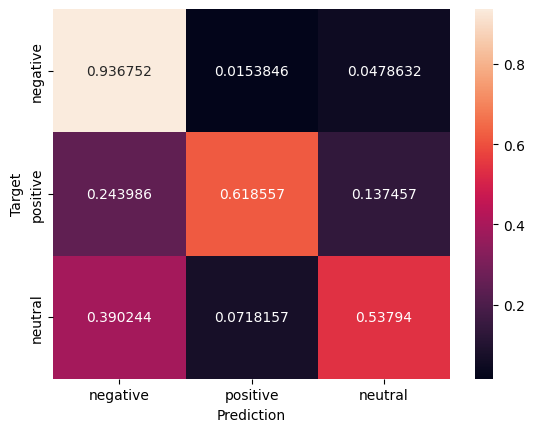

In [21]:
plot_cm(cm_test)

## Binary Labels & Model nterpretation

In [22]:
binary_target_list = [target_map['positive'],target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]


In [23]:
df_b_train.head()

,airline_sentiment,text,target
761,negative,@united at its worse. Can't figure how to pack...,0
8522,negative,@JetBlue I did not report the updated info - d...,0
8883,negative,@JetBlue I'll give u a chance but I don't thin...,0
796,negative,@united Yo yo yo stuck on the tarmac for over ...,0
10908,negative,"@USAirways yes, I was rebooked the next day (W...",0


In [24]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [25]:
y_train = df_b_train['target']
y_test = df_b_test['target']

In [26]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

print('Train acc:', model.score(X_train,y_train))
print('Test acc:', model.score(X_test,y_test))

Train acc: 0.9291101055806938
Test acc: 0.9182067077344285


In [28]:
pr_train = model.predict_proba(X_train)[:,1]
pr_test = model.predict_proba(X_test)[:,1]

print('Train AUC:',roc_auc_score(y_train,pr_train))
print('Test AUC:',roc_auc_score(y_test,pr_test))


Train AUC: 0.9782376336353361
Test AUC: 0.9569069962111199


In [29]:
model.coef_

array([[-0.25816923,  0.25211116, -0.19343176, ..., -0.03544019,
         0.09755027, -0.70716947]])

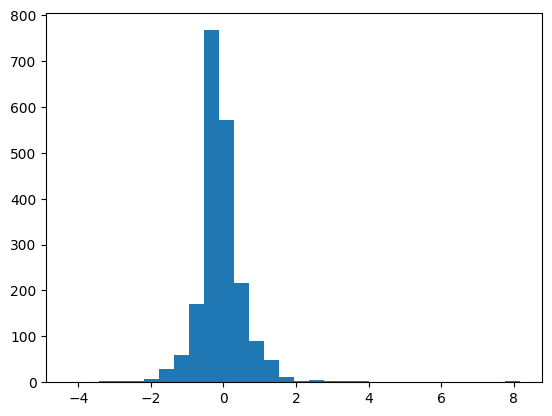

In [30]:
plt.hist(model.coef_[0],bins=30);

In [31]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'united': 1843,
 'at': 195,
 'its': 971,
 'worse': 1968,
 'can': 315,
 'figure': 703,
 'how': 905,
 'to': 1768,
 'plane': 1339,
 'up': 1851,
 'then': 1734,
 'claims': 371,
 'no': 1210,
 'rooms': 1493,
 'in': 933,
 'san': 1516,
 'for': 754,
 'stranded': 1668,
 'pax': 1304,
 'way': 1907,
 'go': 811,
 'jetblue': 976,
 'did': 531,
 'not': 1218,
 'report': 1459,
 'the': 1731,
 'updated': 1853,
 'info': 946,
 'don': 567,
 'know': 996,
 'reach': 1422,
 'them': 1733,
 'without': 1950,
 'super': 1682,
 'long': 1062,
 'wait': 1886,
 'on': 1249,
 'hold': 884,
 'your': 1994,
 'main': 1091,
 'number': 1227,
 'll': 1052,
 'give': 805,
 'chance': 342,
 'but': 301,
 'think': 1740,
 'it': 967,
 'yo': 1991,
 'stuck': 1671,
 'tarmac': 1710,
 'over': 1278,
 'hours': 902,
 'going': 814,
 'miss': 1157,
 'my': 1187,
 'ride': 1485,
 'help': 871,
 'please': 1348,
 'usairways': 1863,
 'yes': 1988,
 'was': 1897,
 'rebooked': 1431,
 'next': 1204,
 'day': 493,
 'thanks': 1729,
 'just': 983,
 'upset': 1858,
 'that

In [33]:
threshold = 2

print('Most Positive Words:')
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight > threshold:
    print(word, weight)

Most Positive Words:
jetblue 3.1466866870173114
thanks 8.118969392085953
southwestair 2.6285538675111257
good 2.742653254674413
thank 8.164291261236198
great 5.510341316792499
awesome 4.247175030196162
wonderful 2.289862304073306
best 3.316731303859982
love 3.9810260199820604
appreciate 2.6497242074291516
worries 2.6110225609258
virginamerica 3.3861340655788124
amazing 3.8464624169232846
excellent 2.7308432122479265
kudos 2.8090474382854604
thx 2.641301962199984
cool 2.181215475637898


In [34]:
print('Most Negative Words:')
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight < threshold:
    print(word, weight)

Most Negative Words:
united -0.06647134958338319
at -0.05314973105063
its 0.280102341293926
worse -0.8962499371983428
can -1.5620802108266272
figure -0.47951919166943296
how -1.7222453828672113
to -0.49364902680438005
plane -0.7712881569302804
up -0.045057599159878135
then -0.42003351089448543
claims -0.14208625805448877
no -3.6819270264503317
rooms -0.2105328730334682
in 0.6774005415145922
san 0.04276220108296356
for -0.05537082450501852
stranded -0.9677464391753204
pax -0.07752691003119096
way 0.4338379149447616
go 0.5540818605222558
did -0.2680485547071219
not -4.266663186209584
report 0.24295302599028146
the 0.4659989853266929
updated -0.046875471563788476
info -0.16618802342017117
don -1.623302201467983
know 0.6792212439549817
reach -0.12130280069621155
them 0.1575016096357642
without -0.9959350271999607
super 1.25060354475171
long -0.257062231437459
wait 0.32619631405891547
on -0.8733872765135992
hold -2.6193929480168765
your -0.9663076415450323
main -0.2588855328209213
number -0

## Finding misclassified tweets

In [39]:
y_train

761      0
8522     0
8883     0
796      0
10908    0
        ..
11964    0
5191     1
13418    0
5390     0
860      0
Name: target, Length: 8619, dtype: int64

In [41]:

# Train a logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)

# Predict the sentiment labels
predictions = model.predict(X_test)

# Predict the probabilities of being in the positive class
probabilities = model.predict_proba(X_test)[:, 1]

# Find misclassified tweets
misclassified_positive = df_b_test[(predictions == 1) & (df_b_test['target'] == 0)]
misclassified_negative = df_b_test[(predictions == 0) & (df_b_test['target'] == 1)]

# Print the misclassified tweets
print("Misclassified Positive Tweets:")
print(misclassified_positive['text'])

print("\nMisclassified Negative Tweets:")
print(misclassified_negative['text'])

Misclassified Positive Tweets:
2957     @united or I'm sure her business will go else ...
914             @united So you are inadequate by accident?
3702     @united thanks! Makes sense. Just annoying tha...
8366     @JetBlue Apparently the pilot had made some an...
8496                     @JetBlue u suck Big Donkey Balls!
                               ...                        
9451     @USAirways lots of fun to be removed from top ...
12713    @AmericanAir thanks to your attendant on fligh...
2372     @united Luckily, I had my disinfectant wipes a...
6270     @SouthwestAir I just wanted Southwest to know ...
12889    Well @AmericanAir we won't be flying you. Rebo...
Name: text, Length: 162, dtype: object

Misclassified Negative Tweets:
8121     @JetBlue haha no need to apologize 😁 I'll be F...
11740    @USAirways nice touch with using my first name...
11257                                @USAirways Will do :)
12710    @AmericanAir thanks.  I actually made it, my c...
2616     @uni